
StellarGraph is a Python library for machine learning on graphs and networks.

The StellarGraph library offers state-of-the-art algorithms for graph machine learning, making it easy to discover patterns and answer questions about graph-structured data.It can solve many machine learning tasks

In [25]:
import networkx as nx
import random
import chardet #needed to be installed for Word2Vec
from gensim.models import Word2Vec

from stellargraph.data import BiasedRandomWalk

from stellargraph import StellarGraph

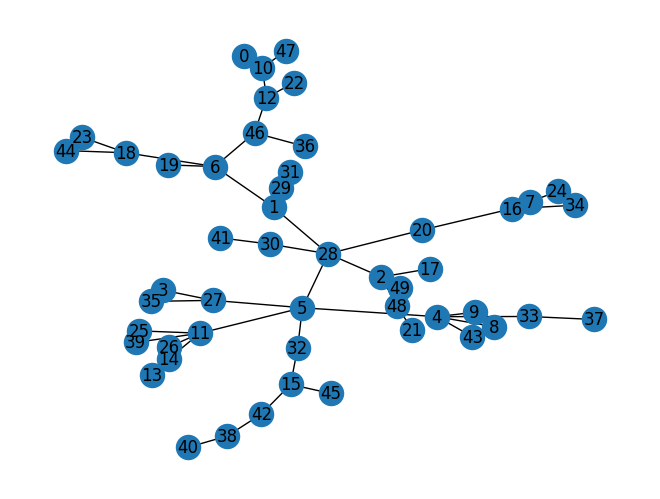

In [26]:

G = nx.fast_gnp_random_graph(n=50, p=0.6)
for (u, v, w) in G.edges(data=True):
    w['weight'] = random.randint(1, 10)

T = nx.minimum_spanning_tree(G)
nx.draw(T, with_labels=True)

In [27]:
stellar_T = StellarGraph.from_networkx(T)
rw = BiasedRandomWalk(stellar_T)

length_sequence = 5
weighted_walks = rw.run(
    nodes=T.nodes(),  # root nodes
    length=length_sequence,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.1,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=0.1,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42,  # random seed fixed for reproducibility
)
print("Number of random walks: {}".format(len(weighted_walks)))

Number of random walks: 500


In [28]:
model = Word2Vec(weighted_walks,
                 vector_size=128,
                 window=5,
                 min_count=0,
                 workers=-1)

embeddings_map = {str(node): model.wv[node] for node in T.nodes()}

node_embeddings = (
    model.wv.vectors
) 

In [29]:
index = 0
num_neighbours = 5
ms = model.wv.most_similar(index, topn = 3)
for x in ms:
    print(x)

(17, 0.1745942234992981)
(16, 0.1576574444770813)
(19, 0.12085064500570297)


[4, 11, 16, 5, 2, 28, 12, 10, 6, 27, 46, 18, 15, 1, 14, 7, 38, 48, 29, 42, 30, 33, 20, 9, 0, 40, 32, 3, 41, 13, 36, 25, 8, 22, 31, 44, 23, 35, 39, 45, 17, 26, 49, 37, 21, 43, 47, 24, 19, 34]


C:\Users\nrk_pavilion\PycharmProjects\simple_graphs_scripts\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nrk_pavilion\PycharmProjects\simple_graphs_scripts\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


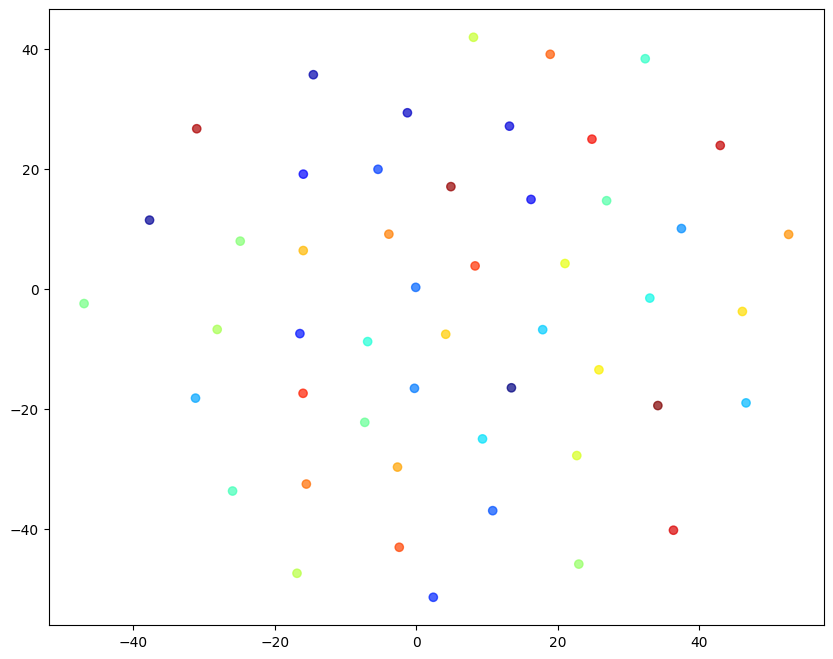

In [31]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
node_ids = model.wv.index_to_key  # list of node IDs
print(node_ids)
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [int(node_id) for node_id in node_ids]

tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)

In [32]:

from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.most_similar('0',topn=3)


Computing transition probabilities:   0%|          | 0/50 [00:00<?, ?it/s]

[('4', 0.6598292589187622),
 ('34', 0.6467410922050476),
 ('46', 0.6282769441604614)]

In [56]:
from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
for edge in model.wv.index_to_key:  # Iterate through word pairs
    try:
        weight = edges_embs[edge[0], edge[1]]  # Get the weight for the edge
        print(f"({edge[0]},{edge[1]}) Edge: {edge}, Weight: {weight[0:3]}....")
    except IndexError:
        print(edge)
        


(2,0) Edge: 20, Weight: [0.01659964 0.00061864 0.03858298]....
(2,3) Edge: 23, Weight: [0.00428911 0.00017241 0.02297832]....
(2,2) Edge: 22, Weight: [2.4102302e-02 9.8916818e-05 5.1663611e-02]....
(3,7) Edge: 37, Weight: [0.00340432 0.00522665 0.01154096]....
(4,5) Edge: 45, Weight: [0.00910123 0.00194171 0.011799  ]....
(1,9) Edge: 19, Weight: [ 2.6357363e-03  9.1387010e-05 -1.1811672e-03]....
(3,6) Edge: 36, Weight: [0.00062005 0.00037017 0.01695406]....
(3,3) Edge: 33, Weight: [0.00076327 0.00030052 0.01022002]....
(3,8) Edge: 38, Weight: [ 4.9864654e-03  1.4572825e-03 -2.4026769e-05]....
1
(3,4) Edge: 34, Weight: [0.00230914 0.00044725 0.02274076]....
(1,5) Edge: 15, Weight: [ 0.00204871 -0.00353453 -0.00033476]....
4
(3,5) Edge: 35, Weight: [0.00300833 0.00130466 0.00530263]....
3
(2,4) Edge: 24, Weight: [0.01297601 0.0002566  0.0511295 ]....
(1,3) Edge: 13, Weight: [ 0.00051979 -0.00081414 -0.0006452 ]....
2
0
(4,8) Edge: 48, Weight: [ 1.5085745e-02  2.1688542e-03 -5.3462434e-05